In [1]:
import pandas as pd 
import requests as req
import json 
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
json_NYSE = ('NYSE.json')
df_NYSE = pd.read_json(json_NYSE)
#df_NYSE.tail()

In [4]:
text_sentiment_compound_NYSE  = []
for i in df_NYSE['text']:
    compound = analyzer.polarity_scores(i)['compound']
    text_sentiment_compound_NYSE.append(compound)

In [5]:
df_NYSE['Compound_NYSE']=text_sentiment_compound_NYSE
#df_NYSE.info()

In [6]:
df_NYSE['Date']=df_NYSE['timestamp'].map(lambda x: x.date())

#use the rename(columns={})
df_NYSE_cleaned_headers = df_NYSE[['Date','Compound_NYSE']]

#get rid of all compounds with a score of equal to zero
df_NYSE_cleaned_headers = df_NYSE_cleaned_headers.loc[(df_NYSE_cleaned_headers['Compound_NYSE']>0) | (df_NYSE_cleaned_headers['Compound_NYSE'] <0)]

df_NYSE_cleaned_compound_NYSE = df_NYSE_cleaned_headers.reset_index(drop=True)

mean_compound_NYSE=df_NYSE_cleaned_compound_NYSE.groupby("Date")["Compound_NYSE"].mean()

#mean_compound_NYSE
df_mean_compound_NYSE=pd.DataFrame(mean_compound_NYSE)
df_mean_compound_NYSE.to_csv("NYSE.csv")
#df_mean_compound_NYSE

In [7]:
json_NASDAQ = ('NASDAQ.json')
df_NASDAQ = pd.read_json(json_NASDAQ)
#df_NASDAQ.tail()

In [8]:
text_sentiment_compound_NASDAQ  = []
for i in df_NASDAQ['text']:
    compound = analyzer.polarity_scores(i)['compound']
    text_sentiment_compound_NASDAQ.append(compound)

In [9]:
df_NASDAQ['Compound_NASDAQ']=text_sentiment_compound_NASDAQ
#df_NASDAQ.info()

In [10]:
df_NASDAQ['Date']=df_NASDAQ['timestamp'].map(lambda x: x.date())

#use the rename(columns={})
df_NASDAQ_cleaned_headers = df_NASDAQ[['Date','Compound_NASDAQ']]

#get rid of all compounds with a score of equal to zero
df_NASDAQ_cleaned_headers = df_NASDAQ_cleaned_headers.loc[(df_NASDAQ_cleaned_headers['Compound_NASDAQ']>0) | (df_NASDAQ_cleaned_headers['Compound_NASDAQ'] <0)]

df_NASDAQ_cleaned_compound_NASDAQ = df_NASDAQ_cleaned_headers.reset_index(drop=True)

mean_compound_NASDAQ=df_NASDAQ_cleaned_compound_NASDAQ.groupby("Date")["Compound_NASDAQ"].mean()

#mean_compound_NASDAQ
df_mean_compound_NASDAQ=pd.DataFrame(mean_compound_NASDAQ)
df_mean_compound_NASDAQ.to_csv("NASDAQ.csv")
#df_mean_compound_NASDAQ

In [11]:
json_DowJones = ('DowJones.json')
df_DowJones = pd.read_json(json_DowJones)
#df_NASDAQ.tail()

In [12]:
text_sentiment_compound_DowJones  = []
for i in df_DowJones['text']:
    compound = analyzer.polarity_scores(i)['compound']
    text_sentiment_compound_DowJones.append(compound)

In [13]:
df_DowJones['Compound_DowJones']=text_sentiment_compound_DowJones
#df_DowJones.info()

In [14]:
df_DowJones['Date']=df_DowJones['timestamp'].map(lambda x: x.date())

#use the rename(columns={})
df_DowJones_cleaned_headers = df_DowJones[['Date','Compound_DowJones']]

#get rid of all compounds with a score of equal to zero
df_DowJones_cleaned_headers = df_DowJones_cleaned_headers.loc[(df_DowJones_cleaned_headers['Compound_DowJones']>0) | (df_DowJones_cleaned_headers['Compound_DowJones'] <0)]

df_DowJones_cleaned_compound_DowJones = df_DowJones_cleaned_headers.reset_index(drop=True)

mean_compound_DowJones=df_DowJones_cleaned_compound_DowJones.groupby("Date")["Compound_DowJones"].mean()

#mean_compound_DowJones
df_mean_compound_DowJones=pd.DataFrame(mean_compound_DowJones)
df_mean_compound_DowJones.to_csv("DowJones.csv")
#df_mean_compound_DowJones

In [15]:
json_stockmarket = ('stockmarket.json')
df_stockmarket = pd.read_json(json_stockmarket)
#df_stockmarket.tail()

In [16]:
text_sentiment_compound_stockmarket  = []
for i in df_stockmarket['text']:
    compound = analyzer.polarity_scores(i)['compound']
    text_sentiment_compound_stockmarket.append(compound)

In [17]:
df_stockmarket['Compound_stockmarket']=text_sentiment_compound_stockmarket
#df_stockmarket.info()

In [18]:
df_stockmarket['Date']=df_stockmarket['timestamp'].map(lambda x: x.date())

#use the rename(columns={})
df_stockmarket_cleaned_headers = df_stockmarket[['Date','Compound_stockmarket']]

#get rid of all compounds with a score of equal to zero
df_stockmarket_cleaned_headers = df_stockmarket_cleaned_headers.loc[(df_stockmarket_cleaned_headers['Compound_stockmarket']>0) | (df_stockmarket_cleaned_headers['Compound_stockmarket'] <0)]

df_stockmarket_cleaned_compound_stockmarket = df_stockmarket_cleaned_headers.reset_index(drop=True)

mean_compound_stockmarket=df_stockmarket_cleaned_compound_stockmarket.groupby("Date")["Compound_stockmarket"].mean()

#mean_compound_stockmarket
df_mean_compound_stockmarket=pd.DataFrame(mean_compound_stockmarket)
df_mean_compound_stockmarket.to_csv("stockmarket.csv")
#df_mean_compound_stockmarket

In [19]:
# Combining CSV files. Getting all mean compound for target terms on one table 
file_stockmarket = "stockmarket.csv"
file_DowJones = "DowJones.csv"
file_NASDAQ = "NASDAQ.csv"
file_NYSE = "NYSE.csv"

In [23]:
stockmarket = pd.read_csv(file_stockmarket)
DowJones = pd.read_csv(file_DowJones)
NASDAQ = pd.read_csv(file_NASDAQ)
NYSE = pd.read_csv(file_NYSE)

In [24]:
stockmarket_DowJones = pd.merge(stockmarket, DowJones, how="inner", on="Date")
stockmarket_DowJones_NASDAQ = pd.merge(stockmarket_DowJones,NASDAQ , how="inner", on="Date")
stockmarket_DowJones_NASDAQ_NYSE = pd.merge(stockmarket_DowJones_NASDAQ, NYSE, how="inner", on="Date")
stockmarket_DowJones_NASDAQ_NYSE

,Date,Compound_stockmarket,Compound_DowJones,Compound_NASDAQ,Compound_NYSE
0,2017-12-01,0.074108,0.112647,0.226000,0.216636
1,2017-12-02,-0.154898,0.015204,0.072217,0.084436
2,2017-12-03,-0.236575,-0.086597,0.267865,0.258864
3,2017-12-04,0.031549,0.023830,0.188898,0.349148
4,2017-12-05,0.012240,-0.014471,0.153072,0.290614
5,2017-12-06,0.076982,-0.068465,0.257540,0.246785
6,2017-12-07,0.117893,-0.013719,0.312886,0.259690
7,2017-12-08,0.124872,0.197037,0.352862,0.130623
8,2017-12-09,0.096967,0.270222,0.334080,0.248486
9,2017-12-10,0.030657,0.264938,0.359973,0.233906


In [25]:
stockmarket_DowJones_NASDAQ_NYSE.to_csv("meancompound_target_terms.csv")

## Line Plot  

In [28]:
import datetime
import numpy as np
from matplotlib import pyplot as plt

In [35]:
# Combining CSV files. Getting all mean compound for target terms on one table 
file_stockmarket = "meancompound_target_terms.csv"
stockmarket = pd.read_csv(file_stockmarket)
df_stockmarket = stockmarket
df_stockmarket


,Unnamed: 0,Date,Compound_stockmarket,Compound_DowJones,Compound_NASDAQ,Compound_NYSE
0,0,2017-12-01,0.074108,0.112647,0.226000,0.216636
1,1,2017-12-02,-0.154898,0.015204,0.072217,0.084436
2,2,2017-12-03,-0.236575,-0.086597,0.267865,0.258864
3,3,2017-12-04,0.031549,0.023830,0.188898,0.349148
4,4,2017-12-05,0.012240,-0.014471,0.153072,0.290614
5,5,2017-12-06,0.076982,-0.068465,0.257540,0.246785
6,6,2017-12-07,0.117893,-0.013719,0.312886,0.259690
7,7,2017-12-08,0.124872,0.197037,0.352862,0.130623
8,8,2017-12-09,0.096967,0.270222,0.334080,0.248486
9,9,2017-12-10,0.030657,0.264938,0.359973,0.233906


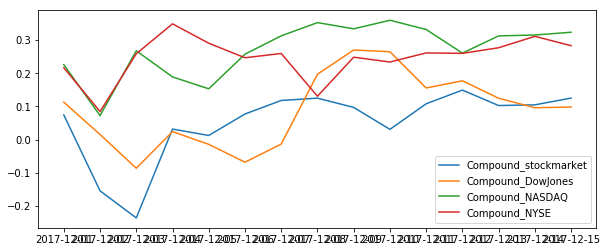

In [36]:
plt.figure(figsize=(10,4))

Date = df_stockmarket['Date']
stockmarket = df_stockmarket['Compound_stockmarket']
DowJones = df_stockmarket['Compound_DowJones']
NASDAQ = df_stockmarket['Compound_NASDAQ']
NYSE = df_stockmarket['Compound_NYSE']



plt.plot(Date,stockmarket)
plt.plot(Date,DowJones)
plt.plot(Date,NASDAQ)
plt.plot(Date,NYSE)
plt.legend(loc='best')
plt.show()
